# Analyzing User Behaviour Patterns

For analyzing user behaviour patterns of EVs over a certain period of time, we can analyse the number of charging points across Australia. More concentration of charging points means more users are inclined to use EVs more often. First, we import the necessary libraries for data manipulation and visualization.

In [6]:
import json
import pandas as pd
import requests
import matplotlib.pyplot as plt

The best source of EV charger data in Australia is Open Charge Map which contains data on location of each and every charging points all over the world. In this cell, we make an API request to the Open Charge Map to retrieve EV charging point data for Australia. We have defined various variables for making the API request, like **url**, which represents the endpoint for the API request. The **headers** variable contains the API key for authentication. The **response** variable represents the result of the API request. Then we print the first two records to verify the data retrieval.

In [2]:
# API Request to Open Charge Map
url = "https://api.openchargemap.io/v3/poi/?output=json&countrycode=AU"

headers = {
    "X-API-Key": "2f5df05b-4b9d-46a3-b38e-c138e919abea"  # Replace 'YOUR_API_KEY' with your actual API key
}
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    print(data[:2])
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")


[{'DataProvider': {'WebsiteURL': 'http://openchargemap.org', 'Comments': None, 'DataProviderStatusType': {'IsProviderEnabled': True, 'ID': 1, 'Title': 'Manual Data Entry'}, 'IsRestrictedEdit': False, 'IsOpenDataLicensed': True, 'IsApprovedImport': True, 'License': 'Licensed under Creative Commons Attribution 4.0 International (CC BY 4.0)', 'DateLastImported': None, 'ID': 1, 'Title': 'Open Charge Map Contributors'}, 'OperatorInfo': {'WebsiteURL': 'https://www.bp.com/en_au/australia/home/products-services/bppulse.html', 'Comments': None, 'PhonePrimaryContact': None, 'PhoneSecondaryContact': None, 'IsPrivateIndividual': False, 'AddressInfo': None, 'BookingURL': None, 'ContactEmail': None, 'FaultReportEmail': None, 'IsRestrictedEdit': False, 'ID': 3659, 'Title': 'BP Pulse (AU)'}, 'UsageType': {'IsPayAtLocation': False, 'IsMembershipRequired': True, 'IsAccessKeyRequired': True, 'ID': 4, 'Title': 'Public - Membership Required'}, 'StatusType': {'IsOperational': True, 'IsUserSelectable': True,

In this cell, we calculate and print the total number of records (instances) in the dataset to get an overview of the data size using the **len()** function with the **data** list as parameter.

In [14]:
# Print the total number of instances in the dataset
total_instances = len(data)
print(f"Total number of instances in the dataset: {total_instances}")


Total number of instances in the dataset: 100


In the below cell, we create a DataFrame from the JSON data and print the column names to understand the structure of the dataset.

In [16]:

# Assuming `data` is your JSON data
df = pd.DataFrame(data)

# Print the column names
print(df.columns)
data = []


Index(['DataProvider', 'OperatorInfo', 'UsageType', 'StatusType',
       'SubmissionStatus', 'UserComments', 'PercentageSimilarity',
       'MediaItems', 'IsRecentlyVerified', 'DateLastVerified', 'ID', 'UUID',
       'ParentChargePointID', 'DataProviderID', 'DataProvidersReference',
       'OperatorID', 'OperatorsReference', 'UsageTypeID', 'UsageCost',
       'AddressInfo', 'Connections', 'NumberOfPoints', 'GeneralComments',
       'DatePlanned', 'DateLastConfirmed', 'StatusTypeID',
       'DateLastStatusUpdate', 'MetadataValues', 'DataQualityLevel',
       'DateCreated', 'SubmissionStatusTypeID'],
      dtype='object')


In this cell, we extract relevant information about charger types, number of points, and power from the dataset for the purpose of data visualization. First of all, 3 empty lists are created, **charger_types**, **points**, and **power_kW**. The **for** loop is used for looping through each station in the **data** list, where **data** is expected to be a list of dictionaries and each dictionary represents a charging station. Inside each station dictionary, there is a key **'Connections'** which is a list of connection types available at that station. This loop iterates over each connection type. The **charger_types.append()** function extracts the title of the connection type and appends it to the **charger_types** list. The **points.append()** function gets the number of charging points available at the station. If this key is not present, it defaults to 0. The result is appended to the **points** list. Lastly, the **power_kW.append()** function retrieves the power output (in kW) of the connection.

After that, we create a DataFrame using the pandas library. Each key in the dictionary passed to **pd.DataFrame()** becomes a column in the DataFrame. The print statements in the end help in verifying the extracted data before performing further analysis.

In [15]:
#Extract information from the dataset
charger_types = []
points = []
power_kW = []

for station in data:
    for connection in station['Connections']:
        charger_types.append(connection['ConnectionType']['Title'])
        points.append(station.get('NumberOfPoints', 0))
        power_kW.append(connection.get('PowerKW', 0))

# Create a DataFrame for analysis
df = pd.DataFrame({
    'ChargerType': charger_types,
    'NumberOfPoints': points,
    'Power_kW': power_kW
})
print(charger_types)
print(points)
# Aggregate data by ChargerType
popularity_df = df.groupby('ChargerType').agg({
    'NumberOfPoints': 'sum',
    'Power_kW': 'sum'
}).reset_index()

['CCS (Type 2)', 'Type 2 (Socket Only)', 'CCS (Type 2)', 'CCS (Type 2)', 'CCS (Type 2)', 'CCS (Type 2)', 'CCS (Type 2)', 'CCS (Type 2)', 'CCS (Type 2)', 'CCS (Type 2)', 'Type 2 (Socket Only)', 'CCS (Type 2)', 'CCS (Type 2)', 'CCS (Type 2)', 'Type 2 (Tethered Connector) ', 'Type 2 (Socket Only)', 'CCS (Type 2)', 'CCS (Type 2)', 'CCS (Type 2)', 'CCS (Type 2)', 'CHAdeMO', 'CHAdeMO', 'CCS (Type 2)', 'CCS (Type 2)', 'CHAdeMO', 'CCS (Type 2)', 'CCS (Type 2)', 'CCS (Type 2)', 'CHAdeMO', 'CCS (Type 2)', 'CHAdeMO', 'Type 2 (Tethered Connector) ', 'Type 2 (Tethered Connector) ', 'Type 2 (Socket Only)', 'CCS (Type 2)', 'CHAdeMO', 'CCS (Type 2)', 'CCS (Type 2)', 'Type 2 (Socket Only)', 'CCS (Type 2)', 'Unknown', 'CCS (Type 2)', 'Type 2 (Socket Only)', 'CHAdeMO', 'Type 2 (Socket Only)', 'CCS (Type 2)', 'Type 2 (Socket Only)', 'Type 2 (Socket Only)', 'CCS (Type 2)', 'Type 2 (Socket Only)', 'Three Phase 5-Pin (AS/NZ 3123)', 'CCS (Type 2)', 'CHAdeMO', 'CCS (Type 2)', 'CCS (Type 2)', 'CCS (Type 2)', 'T

In this cell, we create two bar plots to visualize the popularity of different charger types based on the total number of charging points and their power output.

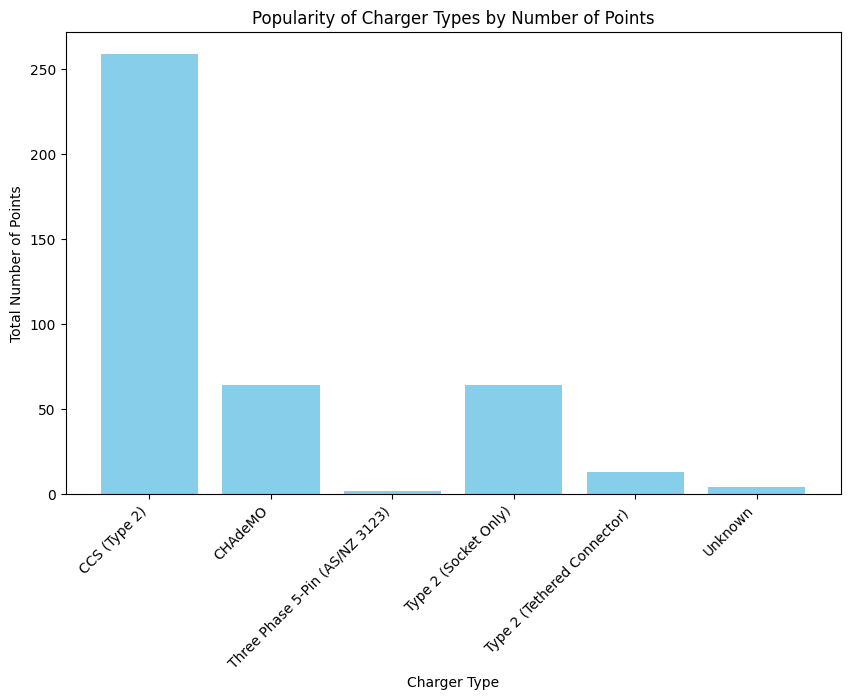

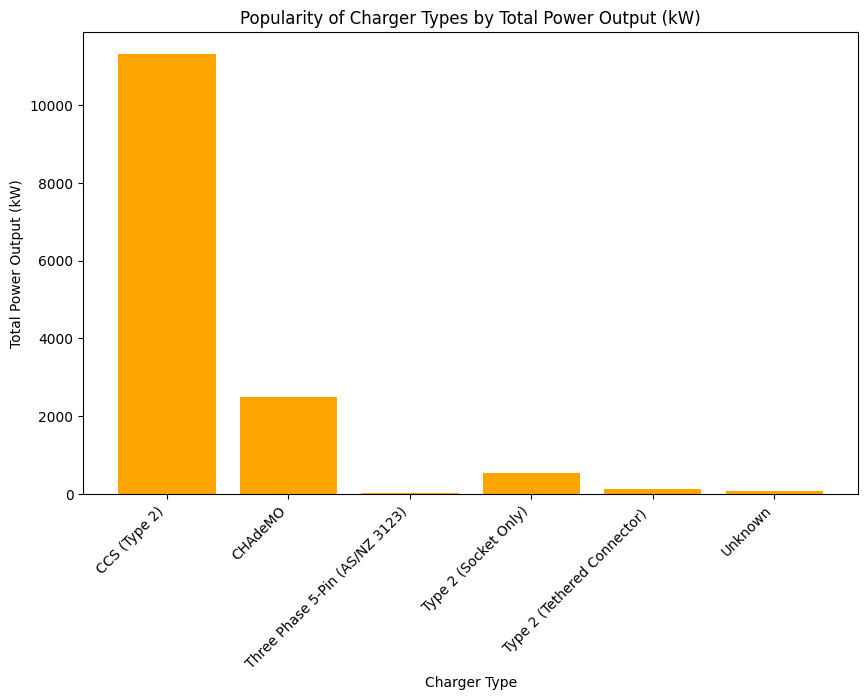

In [12]:
# Visualize the popularity based on number of points
plt.figure(figsize=(10, 6))
plt.bar(popularity_df['ChargerType'], popularity_df['NumberOfPoints'], color='skyblue')
plt.title('Popularity of Charger Types by Number of Points')
plt.xlabel('Charger Type')
plt.ylabel('Total Number of Points')
plt.xticks(rotation=45, ha="right")
plt.show()

# Visualize the popularity based on total power output
plt.figure(figsize=(10, 6))
plt.bar(popularity_df['ChargerType'], popularity_df['Power_kW'], color='orange')
plt.title('Popularity of Charger Types by Total Power Output (kW)')
plt.xlabel('Charger Type')
plt.ylabel('Total Power Output (kW)')
plt.xticks(rotation=45, ha="right")
plt.show()

The above plots indicate that CCS (Type 2) EV charger was used most by the consumers during the years 2023-24 as indicated by its high availability and high power and hence large efficiency. Hence, it was the most suitable type of EV charger.

In this cell, we:
1. Define a function to fetch data from the API.
2. Fetch data and convert it into a DataFrame.
3. Convert **DateCreated** to a naive datetime format and extract year-month periods.
4. Filter the data for the years 2023 and 2024.
5. Count the number of charging stations per month and plot the results.

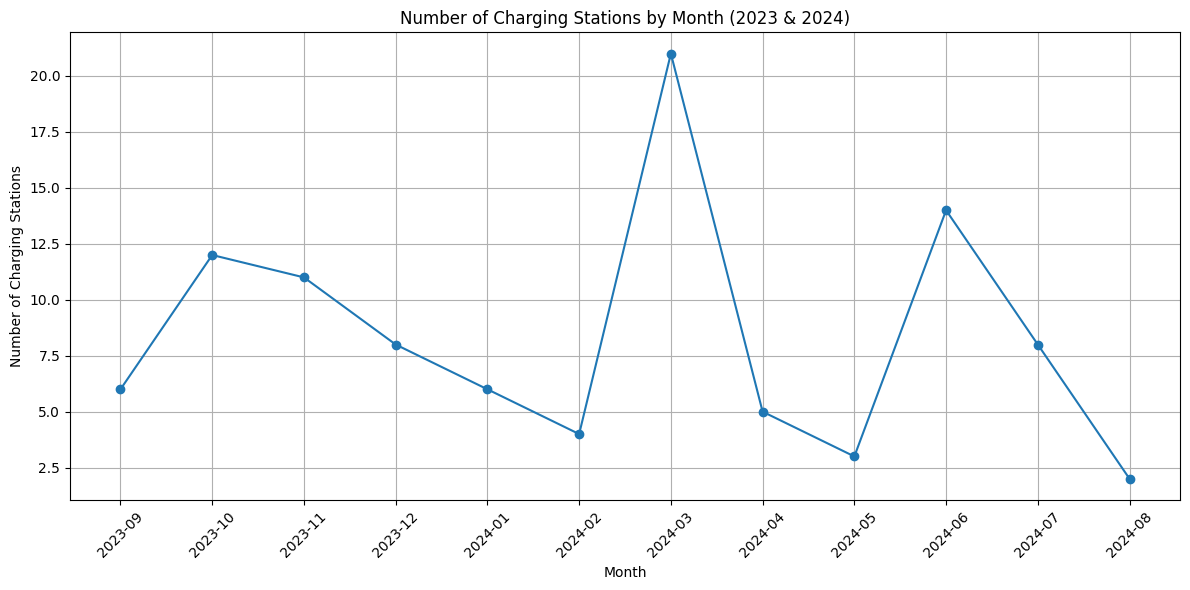

In [25]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Function to fetch data from Open Charge Map
def fetch_data(url, headers):
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to retrieve data. Status code: {response.status_code}")
        return []

# Example URL and headers (update 'YOUR_API_KEY' with your actual API key)
url = "https://api.openchargemap.io/v3/poi/?output=json&countrycode=AU"
headers = {
    "X-API-Key": "2f5df05b-4b9d-46a3-b38e-c138e919abea"
}

# Fetch data
data = fetch_data(url, headers)

# Convert to DataFrame for analysis
df = pd.json_normalize(data)

# Convert 'DateCreated' to datetime
df['DateCreated'] = pd.to_datetime(df['DateCreated'])
# Convert 'DateCreated' to naive datetime
df['DateCreated'] = df['DateCreated'].dt.tz_localize(None)

# Extract year and month
df['YearMonth'] = df['DateCreated'].dt.to_period('M')


# Filter data for 2023 and 2024
df = df[(df['DateCreated'].dt.year == 2023) | (df['DateCreated'].dt.year == 2024)]

# Extract year and month
df['YearMonth'] = df['DateCreated'].dt.to_period('M')

# Count the number of charging stations per month
stations_per_month = df.groupby('YearMonth').size()

# Convert to DataFrame for plotting
stations_per_month_df = stations_per_month.reset_index(name='Number of Charging Stations')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(stations_per_month_df['YearMonth'].astype(str), stations_per_month_df['Number of Charging Stations'], marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Number of Charging Stations')
plt.title('Number of Charging Stations by Month (2023 & 2024)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


The above line plot indicates that the growth of charging stations was seen the most in March 2024. Hence, it indicates that the people showed more interest in using EVs during that time. However, in August 2024 (till now), the growth eas the least indicating that there has been a decrease in poularity of the EVs currently. This can be mainly attributed to the high maintenance and charging costs of EVs. This shows that the EV infrastructure growth will take some time.